In [16]:
import os
import glob
import codecs
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from scipy import stats
from scipy import interpolate
import matplotlib.pyplot as plt

In [17]:
measurement_frequency = 5
preceding_rest_duration = 60
task_duration = 120
following_rest_duration = 60
num_preceding_rest_samples = measurement_frequency*preceding_rest_duration
num_task_samples = measurement_frequency*task_duration
num_following_rest_samples = measurement_frequency*following_rest_duration
separation_char = '\t'
header_index = 49

../data/sample/wot1_Hb_CBox33_Oxy.csv


,Control Box No.33(Oxy),CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,...,CH17,CH18,CH19,CH20,CH21,CH22,Mark,Time,PreScan,HbOffset
0,1,0.000000,0.0,0.000000,-0.007291,-0.000651,-0.001611,-0.000102,-0.001785,-0.001617,...,-0.003737,0.000624,-0.009998,-0.073559,0.011936,0.000000,0,17:08:46.0,0,0
1,2,0.000000,0.0,0.000000,0.007585,0.000868,-0.000195,0.002062,0.001534,0.000079,...,-0.000377,0.006106,-0.011592,-0.181830,0.030616,0.000000,0,17:08:46.0,0,0
2,3,0.000000,0.0,-0.282944,0.042122,0.000886,0.005245,0.003399,0.007011,0.004721,...,0.007822,0.009775,0.005597,-0.235553,0.001715,0.000000,0,17:08:46.0,0,0
3,4,0.000000,0.0,-0.094025,0.034973,-0.003142,0.005487,0.000786,0.003950,0.003495,...,0.003831,0.006979,0.008378,-0.345597,-0.065491,-0.259902,0,17:08:47.0,0,0
4,5,0.000000,0.0,0.137881,0.028349,-0.005554,0.003799,-0.001924,0.001432,0.001686,...,0.004347,0.005848,0.014711,-0.399251,-0.094150,-0.259902,0,17:08:47.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,1619,-0.621537,-0.0,3.678367,1.254770,0.386607,0.686078,0.656765,0.810718,1.086485,...,0.174143,0.147312,0.229650,1.830985,1.154008,-1.083755,0,17:14:10.0,0,0
1619,1620,-0.382640,-0.0,3.528951,1.262203,0.377455,0.674907,0.644161,0.804005,1.082946,...,0.167165,0.136020,0.251261,1.896820,1.422249,-1.083755,0,17:14:10.0,0,0
1620,1621,-0.382640,-0.0,3.277611,1.295933,0.361059,0.660967,0.622564,0.788053,1.071575,...,0.157897,0.120226,0.270716,1.967040,1.671892,-1.083755,0,17:14:10.0,0,0
1621,1622,-0.382640,-0.0,3.178792,1.307364,0.345875,0.645422,0.603882,0.774395,1.062874,...,0.147914,0.106618,0.288151,2.034003,1.977997,-1.208738,0,17:14:10.0,0,0


     Control Box No.33(Oxy)  CH1  CH2       CH3       CH4       CH5       CH6  \
655                     656 -0.0 -0.0  0.103723 -0.162269 -0.097812 -0.410689   

          CH7       CH8       CH9  ...      CH17      CH18      CH19  \
655 -0.166159 -0.349299 -0.235705  ...  0.033284 -0.211434 -0.219037   

         CH20      CH21      CH22  Mark        Time  PreScan  HbOffset  
655 -2.017172  0.359694 -0.059926     1  17:10:57.0        0         0  

[1 rows x 27 columns]
marker_index -> 655
355 655


C:\Users\takum\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


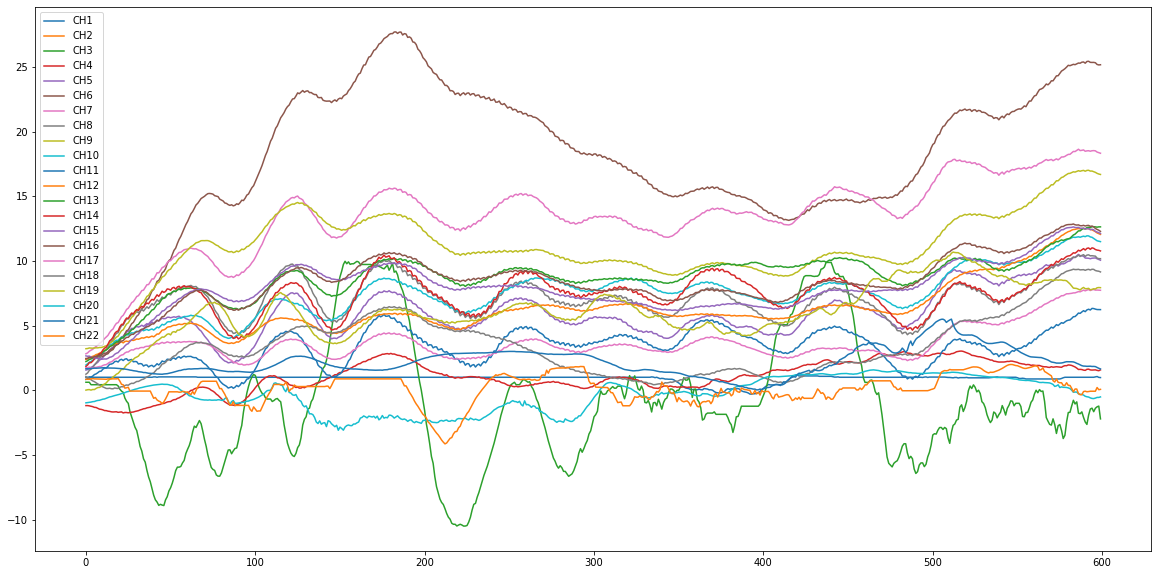

In [18]:
wot_data_filepath = '../data/sample/wot1_Hb_CBox33_Oxy.csv'
print(wot_data_filepath)

df = pd.read_csv(
    wot_data_filepath,
    low_memory=False,
    header=header_index
)

display(df)

column_names =df.columns.values
marker_finding_statement = 'Mark != 0'
marker_index = df.query(marker_finding_statement).index.values[0]

print(df.query(marker_finding_statement))

print('marker_index -> {}'.format(marker_index))

channel_names = column_names[1:23]


plt.figure(figsize=(20,10))
preceding_rest_sampels = df[channel_names].values.astype(float)[marker_index - num_preceding_rest_samples:marker_index]
task_samples = df[channel_names].values.astype(float)[marker_index:marker_index+num_task_samples]
preceding_rest_means = np.mean(preceding_rest_sampels, axis=0)
preceding_rest_stds = np.std(preceding_rest_sampels, axis=0)

print(marker_index-num_preceding_rest_samples,marker_index)

normalized_task_samples = (task_samples-preceding_rest_means)/preceding_rest_stds
plt.plot(normalized_task_samples)
plt.legend(channel_names)
plt.show()



,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20,CH21,CH22
Mean,0.912295,NaN,-0.773727,1.068188,5.952397,18.024479,13.433502,7.012771,11.060100,7.436867,...,8.745030,7.392018,7.908613,8.409950,3.636962,3.399671,6.094394,-0.320997,2.206824,0.158680
Std,0.292757,NaN,4.829253,1.224097,1.872561,5.673370,3.090546,1.626057,2.647265,1.909051,...,1.757172,1.677095,1.983693,2.043822,1.275058,2.324426,2.079044,1.297753,1.058263,1.092704


<Figure size 1440x288 with 0 Axes>

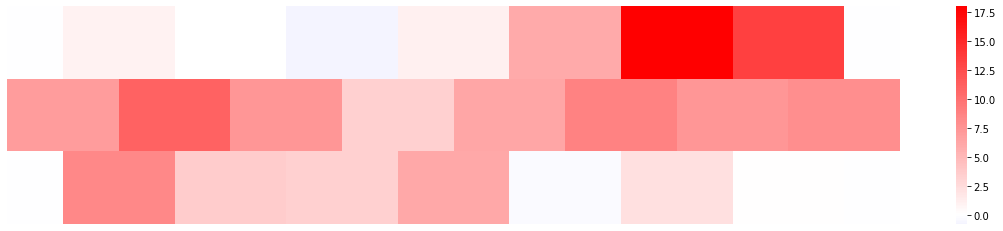

In [19]:
normalized_task_sample_means = np.mean(normalized_task_samples, axis=0)
normalized_task_sample_stds = np.std(normalized_task_samples, axis=0)

summary_df = pd.DataFrame(
    [normalized_task_sample_means, normalized_task_sample_stds],
    columns = channel_names,
    index=['Mean', 'Std']
)
display(summary_df)

fig = plt.figure(figsize=(20,4))
second_row_start_index = 7
third_row_start_index = 15
num_channels = len(channel_names)
num_colspans = 4
num_rows = 3
num_columns = int(num_colspans*np.ceil(num_channels/num_rows))
reshaped_means = np.zeros([3, 16])
reshaped_means[0,1:15:2] = normalized_task_sample_means[:7]
reshaped_means[0,2:16:2] = normalized_task_sample_means[:7]
reshaped_means[1,0::2] = normalized_task_sample_means[7:15]
reshaped_means[1,1::2] = normalized_task_sample_means[7:15]
reshaped_means[2,1:15:2] = normalized_task_sample_means[15:]
reshaped_means[2,2:16:2] = normalized_task_sample_means[15:]
plt.figure(figsize=(20,4))
plt.axis("off")
sns.heatmap(reshaped_means, center=0, cmap='bwr')
plt.show()